In [2]:
import os
import numpy as np

# Define class mapping dictionary
class_mapping = {
    0: 0,   1: 10,  2: 11,  3: 15,
    4: 18,  5: 20,  6: 30,  7: 31,
    8: 32,  9: 40, 10: 44, 11: 48,
   12: 49, 13: 50, 14: 51, 15: 70,
   16: 71, 17: 72, 18: 80, 19: 81
}

def calculate_iou(pred, label, num_classes=20):
    iou_per_class = []
    for class_id in range(num_classes):
        pred_mask = (pred == class_id)
        label_mask = (label == class_id)
        intersection = np.logical_and(pred_mask, label_mask).sum()
        union = np.logical_or(pred_mask, label_mask).sum()
        if union == 0:
            iou_per_class.append(0.0)
        else:
            iou_per_class.append(intersection / union)
    return iou_per_class

def calculate_iou_for_folder(pred_folder, label_folder):
    iou_accumulator = np.zeros(20)  # Initialize accumulator for IoU per class

    # Iterate through files in both folders
    for filename in os.listdir(pred_folder):
        if filename.endswith('.npy'):
            # Load predicted output and ground truth label
            pred = np.load(os.path.join(pred_folder, filename))
            label = np.load(os.path.join(label_folder, filename))

            # Ensure labels are integers
            pred = pred.astype(int)
            label = label.astype(int)

            # Calculate IoU per class for this pair
            iou_per_class = calculate_iou(pred, label)

            # Accumulate IoU per class
            iou_accumulator += np.array(iou_per_class)

    # Calculate average IoU per class
    avg_iou_per_class = iou_accumulator / len(os.listdir(pred_folder))
    return avg_iou_per_class

# Example usage:
pred_folder = '/DATA2/Vivek/Code/Implementation/Downstream_Task/RangeNet++/Mix_Training/Output_2.0/T2/Pred_Image/'
#label_folder = '/DATA2/Vivek/Data/Downstream Task/Test/test_lidar_label/'
label_folder = '/DATA2/Vivek/Data/Downstream Task/Test/test_lidar_label/'

avg_iou_per_class = calculate_iou_for_folder(pred_folder, label_folder)
for class_id, iou in enumerate(avg_iou_per_class):
    print(f"Class {class_id}: IoU = {iou:.4f}")


Class 0: IoU = 0.7343
Class 1: IoU = 0.0001
Class 2: IoU = 0.0000
Class 3: IoU = 0.0000
Class 4: IoU = 0.0000
Class 5: IoU = 0.0000
Class 6: IoU = 0.0000
Class 7: IoU = 0.0000
Class 8: IoU = 0.0000
Class 9: IoU = 0.4996
Class 10: IoU = 0.0000
Class 11: IoU = 0.1271
Class 12: IoU = 0.0000
Class 13: IoU = 0.3342
Class 14: IoU = 0.0001
Class 15: IoU = 0.3697
Class 16: IoU = 0.0000
Class 17: IoU = 0.0392
Class 18: IoU = 0.0000
Class 19: IoU = 0.0000


In [4]:
#Second Method - IOU
import numpy as np
import os

def load_npy_files(folder):
    # Load all .npy files from a folder
    npy_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.npy')]
    return [np.load(f) for f in npy_files]

def calculate_iou(pred_folder, label_folder, num_classes):
    # Load predicted and ground truth images
    pred_images = load_npy_files(pred_folder)
    label_images = load_npy_files(label_folder)

    iou_per_class = np.zeros(num_classes)
    for c in range(num_classes):
        intersection = 0
        union = 0
        
        for pred, label in zip(pred_images, label_images):
            # For class 'c', calculate intersection and union
            pred_c = (pred == c)
            label_c = (label == c)
            
            intersection += np.sum(pred_c & label_c)  # Intersection
            union += np.sum(pred_c | label_c)  # Union

        iou_per_class[c] = intersection / union if union > 0 else np.nan  # Handle no union case

    return iou_per_class

# Specify your folders and number of classes
pred_folder = '/DATA2/Vivek/Code/Implementation/Downstream_Task/RangeNet++/Mix_Training/Output_2.0/T1/Pred_Image/'
label_folder = '/DATA2/Vivek/Data/Downstream Task/Test/test_lidar_label/'
num_classes = 20

# Calculate IoU
iou = calculate_iou(pred_folder, label_folder, num_classes)

# Print IoU for each class
for i, score in enumerate(iou):
    print(f'Class {i}: IoU = {score}')


Class 0: IoU = 0.7168819990767946
Class 1: IoU = 0.0007203245251544907
Class 2: IoU = 0.0
Class 3: IoU = 0.0
Class 4: IoU = 0.0
Class 5: IoU = 0.0
Class 6: IoU = 0.0
Class 7: IoU = 0.0
Class 8: IoU = nan
Class 9: IoU = 0.570610498967689
Class 10: IoU = 0.0
Class 11: IoU = 0.2331274864660312
Class 12: IoU = 0.0
Class 13: IoU = 0.37764683962539847
Class 14: IoU = 1.3500426484217499e-05
Class 15: IoU = 0.36894138331493415
Class 16: IoU = 0.0
Class 17: IoU = 0.043175470155299225
Class 18: IoU = 0.0
Class 19: IoU = 0.0


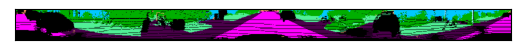

In [14]:
#Predicted Output
import numpy as np
import matplotlib.pyplot as plt

learning_map = {
    0: 0,     # "unlabeled"
    1: 0,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the inverse mapping dictionary
learning_map_inv = {
    0: 0,     # "unlabeled"
    1: 0,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the color mapping dictionary
color_map = {
    0: [0, 0, 0],
    1: [0, 0, 255],
    10: [245, 150, 100],
    11: [245, 230, 100],
    13: [250, 80, 100],
    15: [150, 60, 30],
    16: [255, 0, 0],
    18: [180, 30, 80],
    20: [255, 0, 0],
    30: [30, 30, 255],
    31: [200, 40, 255],
    32: [90, 30, 150],
    40: [255, 0, 255],
    44: [255, 150, 255],
    48: [75, 0, 75],
    49: [75, 0, 175],
    50: [0, 200, 255],
    51: [50, 120, 255],
    52: [0, 150, 255],
    60: [170, 255, 150],
    70: [0, 175, 0],
    71: [0, 60, 135],
    72: [80, 240, 150],
    80: [150, 240, 255],
    81: [0, 0, 255],
    99: [255, 255, 50],
    252: [245, 150, 100],
    256: [255, 0, 0],
    253: [200, 40, 255],
    254: [30, 30, 255],
    255: [90, 30, 150],
    257: [250, 80, 100],
    258: [180, 30, 80],
    259: [255, 0, 0]
}

# Load the NumPy file
#file_path = "/DATA2/Vivek/Code/Implementation/Downstream Task/RangeNet++/Output/T3/Pred_Image/10_000179.npy" #Predicted
#file_path = "/DATA2/Vivek/Vivekk/Data/VoxelScape/Voxel_Downstream_Task/Test/test_lidar_label/10_000179.npy" #Target
file_path = '/DATA2/Vivek/Data/Downstream Task/Val/label_test_lidar/08_000653.npy'
data = np.load(file_path)

# Define inverse mapping function (assuming keys are unique)
def inverse_map(val):
  for key, value in learning_map.items():
    if value == val:
      return key
  return 0  # Assign unlabeled value if not found

# Apply inverse mapping to the data
data_mapped = np.vectorize(inverse_map)(data)

# Create color image based on color map
color_image = np.empty((data.shape[0], data.shape[1], 3), dtype=np.uint8)
for i in range(data_mapped.shape[0]):
  for j in range(data_mapped.shape[1]):
    color_image[i, j] = color_map[data_mapped[i, j]]

# Display the color image without ticks and border
plt.imshow(color_image, extent=(0, data.shape[1], 0, data.shape[0]))  # Set extent
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
import numpy as np

file_path = '/DATA2/Vivek/Data/Downstream Task/Val/label_test_lidar/08_000653.npy'
array_data = np.load(file_path)
unique_values, counts = np.unique(array_data, return_counts=True)

print("Unique values in the array along with their counts:")
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")


Unique values in the array along with their counts:
0.0: 21851
1.0: 389
9.0: 7356
11.0: 9725
13.0: 5129
14.0: 31
15.0: 13954
17.0: 6982
18.0: 119


In [2]:
#Calculating the weights of the bmapped labels: 

# Original label weights
original_weights = {
        0: 0.018889854628292943,
    1: 0.0002937197336781505,
    10: 0.040818519255974316,
    11: 0.00016609538710764618,
    13: 2.7879693665067774e-05,
    15: 0.00039838616015114444,
    16: 0.0,
    18: 0.0020633612104619787,
    20: 0.0016218197275284021,
    30: 0.00017698551338515307,
    31: 1.1065903904919655e-08,
    32: 5.532951952459828e-09,
    40: 0.1987493871255525,
    44: 0.014717169549888214,
    48: 0.14392298360372,
    49: 0.0039048553037472045,
    50: 0.1326861944777486,
    51: 0.0723592229456223,
    52: 0.002395131480328884,
    60: 4.7084144280367186e-05,
    70: 0.26681502148037506,
    71: 0.006035012012626033,
    72: 0.07814222006271769,
    80: 0.002855498193863172,
    81: 0.0006155958086189918,
    99: 0.009923127583046915,
    252: 0.001789309418528068,
    253: 0.00012709999297008662,
    254: 0.00016059776092534436,
    255: 3.745553104802113e-05,
    256: 0.0,
    257: 0.00011351574470342043,
    258: 0.00010157861367183268,
    259: 4.3840131989471124e-05
}

# Mapping of original labels to mapped labels
label_mapping = {
    0: 0, 1: 0, 10: 1, 11: 2, 13: 5, 15: 3, 16: 5, 18: 4, 20: 5, 30: 6, 31: 7, 32: 8,
    40: 9, 44: 10, 48: 11, 49: 12, 50: 13, 51: 14, 52: 0, 60: 9, 70: 15, 71: 16, 72: 17,
    80: 18, 81: 19, 99: 0, 252: 1, 253: 7, 254: 6, 255: 8, 256: 5, 257: 5, 258: 4, 259: 5
}

# Initialize dictionary for mapped label weights
mapped_weights = {mapped_label: 0.0 for mapped_label in set(label_mapping.values())}

# Aggregate weights for mapped labels
for original_label, weight in original_weights.items():
    mapped_label = label_mapping[original_label]
    mapped_weights[mapped_label] += weight

print("Weights for mapped labels:")
print(mapped_weights)


Weights for mapped labels:
{0: 0.03150183342534689, 1: 0.042607828674502385, 2: 0.00016609538710764618, 3: 0.00039838616015114444, 4: 0.0021649398241338114, 5: 0.0018070552978863615, 6: 0.0003375832743104974, 7: 0.00012711105887399155, 8: 3.746106399997359e-05, 9: 0.19879647126983288, 10: 0.014717169549888214, 11: 0.14392298360372, 12: 0.0039048553037472045, 13: 0.1326861944777486, 14: 0.0723592229456223, 15: 0.26681502148037506, 16: 0.006035012012626033, 17: 0.07814222006271769, 18: 0.002855498193863172, 19: 0.0006155958086189918}


In [2]:
import torch
weights = {
    0: 0.012435843358855257, 1: 0.07084600265353548, 2: 0.0036331568465433122,
    3: 0.0024746719284991833, 4: 0.03963860185398928, 5: 0.010680881905904226,
    6: 0.04319204406549489, 7: 0.008983132005921277, 8: 0.0028492674204722485,
    9: 0.24428430602039514, 10: 0.0032094812797592363, 11: 0.14095381885918182,
    12: 0.0, 13: 0.27130546831301566, 14: 0.008430416581490963, 15: 0.06369792522894488,
    16: 0.03320962649268567, 17: 0.006247318243276751, 18: 0.031939692185776705,
    19: 0.001986299257892859
}

weight = torch.Tensor(list(weights.values()))
print(weight)


tensor([0.0124, 0.0708, 0.0036, 0.0025, 0.0396, 0.0107, 0.0432, 0.0090, 0.0028,
        0.2443, 0.0032, 0.1410, 0.0000, 0.2713, 0.0084, 0.0637, 0.0332, 0.0062,
        0.0319, 0.0020])
